
# CODE TO CLASSIFY YELP REVIEWS (NLP)


# PROBLEM STATEMENT

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 




In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


# STEP #0: LIBRARIES IMPORT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [3]:
yelp_df = pd.read_csv("/drive/My Drive/Project 7/yelp.csv")

In [4]:
yelp_df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [5]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [6]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


# STEP #2: VISUALIZE DATASET

In [8]:
# Let's get the length of the messages
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


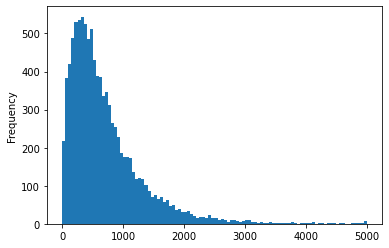

In [9]:
yelp_df['length'].plot(bins=100, kind='hist') 

In [10]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [11]:
# Let's see the longest message 43952
yelp_df[yelp_df['length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [12]:
# Let's see the shortest message 
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

In [13]:
# Let's see the message with mean length 
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

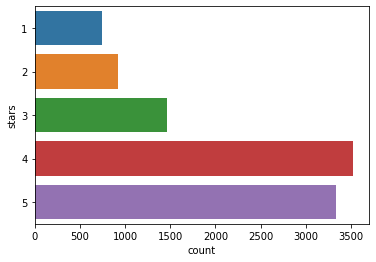

In [14]:
sns.countplot(y = 'stars', data=yelp_df)

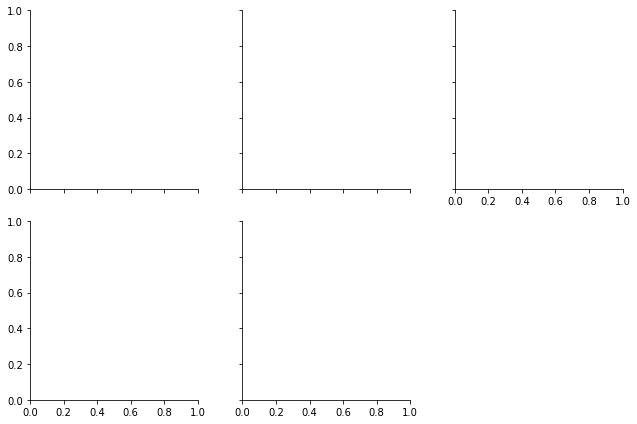

In [15]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=3)

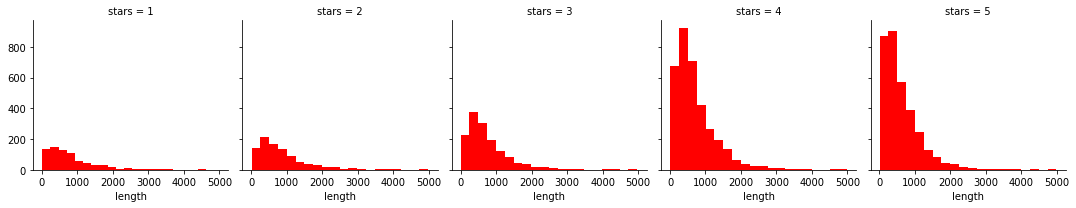

In [16]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [17]:
# Let's divide the reviews into 1 and 5 stars

In [18]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]

In [19]:
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [20]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [21]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [22]:
yelp_df_1_5 = pd.concat([yelp_df_1 , yelp_df_5])

In [ ]:
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,304
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,877
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,154
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,2646
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,610


In [23]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [24]:
print( '1-Stars percentage =', (len(yelp_df_1) / len(yelp_df_1_5) )*100,"%")

1-Stars percentage = 18.330885952031327 %


In [25]:
print( '5-Stars percentage =', (len(yelp_df_5) / len(yelp_df_1_5) )*100,"%")

5-Stars percentage = 81.66911404796868 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


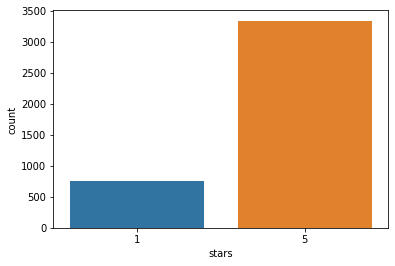

In [26]:
sns.countplot(yelp_df_1_5['stars'], label = "Count") 

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 EXERCISE: REMOVE PUNCTUATION

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [29]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

# STEP 3.2 EXERCISE: REMOVE STOPWORDS

In [32]:
# You have to download stopwords Package to execute this command
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [34]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [36]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [37]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation    ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

# STEP 3.3 EXERCISE: COUNT VECTORIZER EXAMPLE 

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [39]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [40]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [41]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


# LET'S APPLY THE PREVIOUS THREE PROCESSES TO OUR YELP REVIEWS EXAMPLE

In [42]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [43]:
# Let's test the newly added function
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [44]:
print(yelp_df_clean[0]) # show the cleaned up version

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [45]:
print(yelp_df_1_5['text'][0]) # show the original version

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


# LET'S APPLY COUNT VECTORIZER TO OUR YELP REVIEWS EXAMPLE

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])


In [47]:
print(vectorizer.get_feature_names())


['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

In [48]:
print(yelp_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
yelp_countvectorizer.shape

(4086, 26435)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [50]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values


In [51]:
label

array([1, 1, 1, ..., 5, 5, 5])

In [52]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
testing_sample = ['amazing food! highly recommmended']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([5])

In [54]:
testing_sample = ['shit food, made me sick']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [55]:
X = yelp_countvectorizer
y = label

In [56]:
X.shape

(4086, 26435)

In [57]:
y.shape

(4086,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# STEP#5: EVALUATING THE MODEL 

In [60]:
from sklearn.metrics import classification_report, confusion_matrix


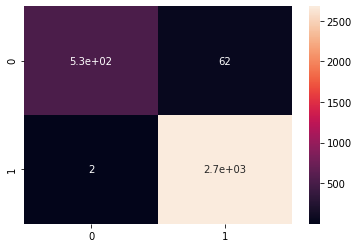

In [61]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

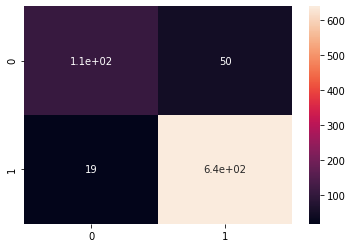

In [62]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.85      0.69      0.76       159
           5       0.93      0.97      0.95       659

    accuracy                           0.92       818
   macro avg       0.89      0.83      0.85       818
weighted avg       0.91      0.92      0.91       818



# STEP #6: LET'S ADD ADDITIONAL FEATURE TF-IDF

- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [64]:
yelp_countvectorizer

<4086x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf.shape)

(4086, 26435)


In [66]:
yelp_tfidf

<4086x26435 sparse matrix of type '<class 'numpy.float64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [67]:
print(yelp_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

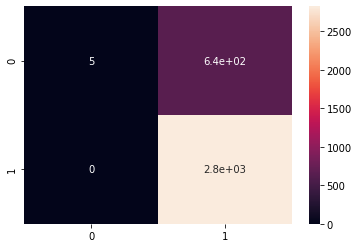

In [68]:
X = yelp_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH NLP, GREAT JOB!